<a href="https://colab.research.google.com/github/DorotaJanosz/data-science-bootcamp/blob/master/supervised/02_regression/03_linear_regression_R3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120, formatter=dict(float=lambda x: f'{x:.2f}'))




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


In [5]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [6]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

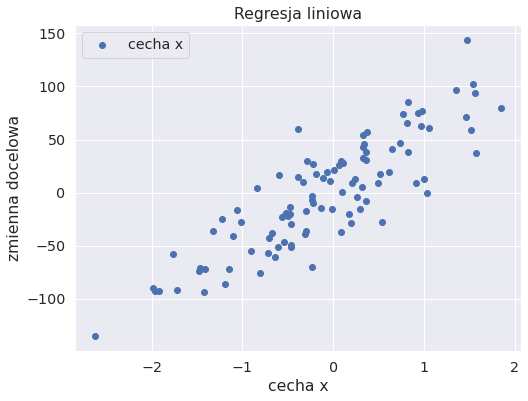

In [7]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.legend()
plt.show()

###Regresja liniowa przy uzyciu scikit-learn

In [8]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
regressor.score(data, target) 

0.7426670084336404

In [0]:
y_pred = regressor.predict(data)
y_pred

###Wizualizacja graficzna modelu

In [0]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, y_pred, color='red', label='model')
plt.legend()
plt.show()

In [0]:
regressor.coef_

In [0]:
regressor.intercept_

In [0]:
[item for item in dir(regressor) if not item.startswith('_')] #wyświetla możliwe atrybuty dla regressor

###Końcowa postać modelu

In [0]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, regressor.intercept_ + regressor.coef_[0] * data, color='red', label='model')
plt.legend()
plt.show()

###Regresja z podziałem na zbór treningowy i testowy

In [0]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.25)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')


In [0]:
plt.figure(figsize=(8,6))
plt.title('Regresa liniowa train vs. test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.legend()
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [0]:
regressor.score(X_train, y_train)

In [0]:
regressor.score(X_test, y_test)

###Regresja liniowa - zbiór tereningowy - wizualizacja

In [0]:
plt.figure(figsize=(8,6))
plt.title('Regresa liniowa zbiór treningowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red')
plt.legend()
plt.show()

###Regresja - zbiór testowy - wizualizacja

In [0]:
plt.figure(figsize=(8,6))
plt.title('Regresa liniowa zbiór testowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.plot(X_test, regressor.intercept_ + regressor.coef_[0] * X_test, color='red')
plt.legend()
plt.show()

###Predykcja na podstawie modelu

In [0]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data={'y_true':y_test, 'y_pred': y_pred})
predictions

In [0]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions

In [0]:
predictions['error'].plot(kind='hist', bins=50, figsize=(8,6))